In [2]:
####################### GENERAL AUXILIARY FUNCTIONS #######################
## The following structure helps us to have functions with multiple outputs
### credit: https://stat.ethz.ch/pipermail/r-help/2004-June/053343.html
list <- structure(NA,class="result")
"[<-.result" <- function(x,...,value) {
  args <- as.list(match.call())
  args <- args[-c(1:2,length(args))]
  length(value) <- length(args)
  for(i in seq(along=args)) {
    a <- args[[i]]
    if(!missing(a)) eval.parent(substitute(a <- v,list(a=a,v=value[[i]])))
  }
  x
}

In [3]:
# reading the data
read.data <- function(file.name, scaling=FALSE) {
  data <- read.csv(file=file.name,head=TRUE,sep=",")
  data <- data[complete.cases(data),] # removes rows with NA values
  D <- ncol(data)
  x = data[,-D]
  y = data[,D]
  if (isTRUE(scaling)) {
    x = scale(x)
    y = scale(y)
  }
  return (list('x' = x, 'y' = y))
}

In [4]:
error.rate <- function(Y1, T1){
  if (length(Y1)!=length(T1)){
    stop('error.rate: size of true labels and predicted labels mismatch')
  }
  return (sum(T1!=Y1)/length(T1))
}

## Perceptron

In [5]:
####################### PERCEPTRON #######################
## prediction
perceptron.predict <- function(Phi, W){
  return(ifelse(Phi%*%W>=0, +1, -1))
}
## is it a misclassification? if yes, update the weight vector
is.a.miss <- function(Phi, W, T1){
  return((W%*%Phi)*T1<0)
}
## Perceptron Build function
perceptron.build <- function(X1, T1, eta=0.01, epsilon=0.001, tau.max=100, plotting=FALSE){
  if (length(unique(T1))!=2){
    stop("Perceptron: The input data is not a binary classification problem.")
  }
  if (all(sort(unique(T1)) != c(-1, 1))) {
    stop("Perceptron: The labels are not (-1, +1).")
  }
  
  N1 <- nrow(X1)
  Phi <- as.matrix(cbind(1, X1)) # add a column of 1 as phi_0

  W <- matrix(NA,nrow=tau.max, ncol=ncol(Phi)) # Empty Weight vector
  W[1,] <- 2*runif(ncol(Phi))-1 # Random initial values for weight vector
  error.rec <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
  error.rec[1] <- error.rate(perceptron.predict(Phi, W[1,]), T1) # record error for initial weights
  tau <- 1 # iteration counter 
  terminate <- FALSE # termination status
  
  while(!terminate){
    # resuffling train data and associated labels:
    indx <- sample(1:N1, replace = FALSE)
    Phi <- Phi[indx,]
    T1 <- T1[indx]
    
    for (i in 1:N1){
      if (tau >= tau.max) {break}
      # look for missclassified samples
      if (is.a.miss(Phi[i,], W[tau,], T1[i])){
        tau <- tau +1                                 # update tau counter
        W[tau,] <- W[tau-1,] + eta * Phi[i,] * T1[i]  # update the weights
        error.rec[tau] <- error.rate(perceptron.predict(Phi, W[tau,]), T1)# update the records
        eta = eta * 0.99                                 # decrease eta
      } 
    }
    
    # recalculate termination conditions
    terminate <- tau >= tau.max | (abs(error.rec[tau] - error.rec[tau-1]) <= epsilon )
    
  }
  if (plotting){
    plot(error.rec[complete.cases(error.rec),], xlab = 'Number Of Iterations', ylab = 'error', main = 'Perceptron Training Error Rate')
  }
  W <- W[complete.cases(W),]  # cut the empty part of the matrix (when the loop stops before tau == tau.max)
  return(W[nrow(W),])         # return the last weight vector
}


In [6]:
# Read the datasets
set.seed(1234)          # set random seed
library(ggplot2)        # load libraries
list[X1,T1] <- read.data('Task2B_train.csv') # read training data
T1[T1==0] <- -1         # convert 0 labels to -1 
list[X2,T2] <- read.data('Task2B_test.csv') # read test data
T2[T2==0] <- -1         # convert 0 labels to -1 




Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [7]:
head(X1)
head(X2)
head(T1)
head(T2)

x1,x2
-0.4365731,0.31994476
-0.3351625,-0.60774359
0.8914051,-0.11175734
-0.1892440,0.83644710
0.9231484,0.60879178
-0.8316286,-0.09605136


x1,x2
0.4973951,-0.5492695
0.2139925,0.6141635
-0.4656182,0.5093878
-0.1380630,0.8841224
0.6593270,0.3378901
0.6670054,0.6012369


[1] -1  1  1  1  1  1

[1]  1 -1  1  1  1  1

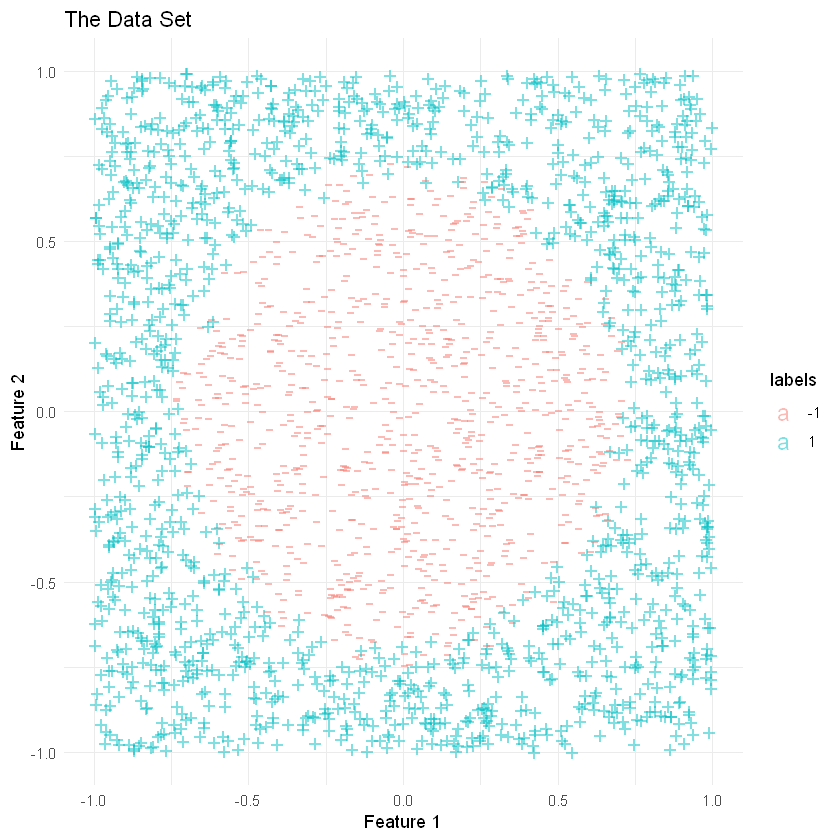

In [8]:
labels=as.factor(T1)
ggplot(data=X1,aes(x=x1,y=x2,color= labels, label=ifelse(T1==+1,"+","-"))) + geom_text(size = 5,alpha=0.5)+
ggtitle("The Data Set") +labs(x = "Feature 1", y="Feature 2")+ theme_minimal()

## Training Error Curve

In [9]:
set.seed(1234)
# Build a perceptron and plot its train error curve

W<-perceptron.build(X1, T1, tau.max = 1000, plotting = FALSE) # Run this a few times until you are happy with the result

#? Evaluate Perceptron (TO BE COMPLETE)
## Hint: compute Phi, predict the test labels based on the model from the above statements, and then compare the predicted labels with the real labels


W

[1] 0.02047149 0.08518164 0.09541663

## Run the implemenation of Perceptron and, calculate the test error, and plot the test data while the points are colored with their estimated class labels.

In [11]:
Phi<-as.matrix(cbind(1,X2))
T2_1<-ifelse((Phi%*%W)>0,eval(parse(text=+1)),eval(parse(text=-1)))
head(T2_1)

1
1
1
1
1
1


In [12]:
miss<-data.frame(cbind('true'=T2,'pred'=T2_1)) # here the second column are the true labels
colnames(miss)[2] <- "pred"
colnames(miss)[1] <- "true"


In [13]:
head(miss)

true,pred
1,1
-1,1
1,1
1,1
1,1
1,1


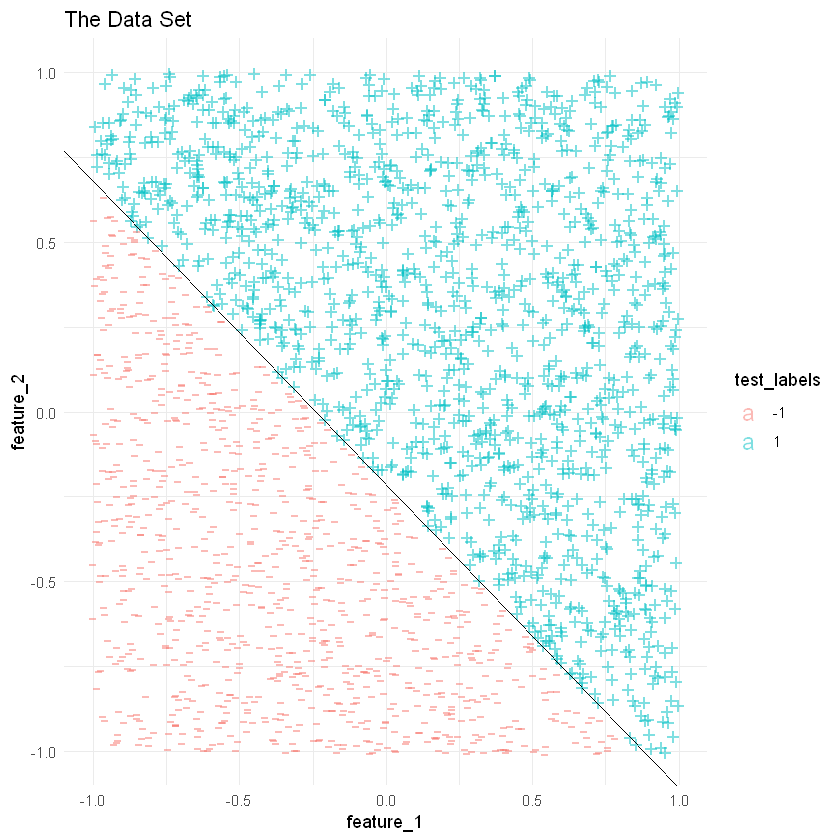

In [16]:
test_labels=as.factor(T2_1)
ggplot(data=X2,aes(x=x1,y=x2,color= test_labels, label=ifelse(test_labels!=-1,"+","-"))) + geom_text(size = 5,alpha=0.5)+
geom_abline(intercept=- W[1]/W[3],slope=-W[2]/W[3])+ggtitle("The Data Set") +labs(x="feature_1",y="feature_2") + theme_minimal()

## Perceptron Test  Rate

In [17]:
perceptron_error<-error.rate(perceptron.predict(Phi, W), T1)
perceptron_error

[1] 0.4888

## Neural Network

In [18]:
## the activation function (tanh here)
h <- function(z, a=1) { #activation function (sigmoid here)
  return ((exp(z)-a^(-z))/(exp(z)+exp(-z)))
}
## the derivitive of the activation function (tanh here)
h.d <- function(z, a=1) {
  return (1-(h(z, a))^2)
}

In [19]:
## Class Probabilities
class.prob <- function(X, W1, W2, b1, b2){
  a2 <- h(sweep(W1 %*% X, 1, b1,'+' ))
  a3 <- h(sweep(W2 %*% a2, 1, b2,'+' ))
  return (a3)
}

In [20]:
## prediction
nn.predict <- function(X, W1, W2, b1, b2, threshold=0){
  return (ifelse(class.prob(X, W1, W2, b1, b2)>=threshold, 1, -1))
}

In [21]:
## feedforward step
feedforward <- function(Xi, Ti, W1, b1, W2, b2){
  ### 1st (input) layer 
  a1 <- Xi
  y <- Ti
  ### 2nd (hidden) layer
  z2 <- W1 %*% a1 + b1
  a2 <- h(z2)        
  ### 3rd (output) layer
  z3 <- W2 %*% a2 + b2
  a3 <- h(z3)  
  return(list(a1, a2, a3, y, z2, z3))
}

In [22]:
## backpropagation step
backpropagation <- function(Ti, W2, z2, z3, a3){
  ### 3rd (output) layer
  d3 <- -(Ti-a3) * h.d(z3)
  ### 2nd (hidden) layer
  d2 <-  t(W2)%*%d3  * h.d (z2)
  return(list(d2,d3))
}

In [23]:
####################### NEURAL NET ####################### 
## NN build function
nn.build <- function(K, X1, T1, plotting=FALSE, epoch.max=50, eta = 0.1, lambda = 0.01){
  # initialization
  if (plotting) {error.rec <- matrix(NA,nrow=epoch.max, ncol=1)}
  D <- nrow(X1)
  if (D!=2) {stop('nn.predict: This simple version only accepts two dimensional data.')}
  N <- ncol(X1)

  W1 <- matrix(rnorm(D*K, sd=0.5), nrow=K, ncol=D)
  b1 <- matrix(rnorm(1*K), nrow=K, ncol=1)
  W2 <- matrix(rnorm(K*1, sd=0.5), nrow=1, ncol=K)
  b2 <- matrix(rnorm(1*1), nrow=1, ncol=1)

  for (epoch in 1:epoch.max){   
    ## delta vectors/matrices initialization
    W1.d <- W1 *0
    b1.d <- b1 *0
    W2.d <- W2 *0
    b2.d <- b2 *0

    for (i in 1:N){
      ## Feedforward:
      list[a1, a2, a3, y, z2, z3] <- feedforward(X1[,i], T1[i], W1, b1, W2, b2)          
      ## Backpropagation:
      list[d2, d3] <- backpropagation(T1[i], W2, z2, z3, a3)
      ## calculate the delta values
      ### 1st layer
      W1.d <- W1.d + d2 %*% t(a1)
      b1.d <- b1.d + d2
      ### 2nd layer
      W2.d <- W2.d + d3 %*% t(a2)
      b2.d <- b2.d + d3
    }
    ## update weight vectors and matrices
    W1 <- W1 - eta * (W1.d/N + lambda*W1)
    b1 <- b1 - eta * (b1.d/N)
    W2 <- W2 - eta * (W2.d/N + lambda*W2)
    b2 <- b2 - eta * (b2.d/N)
    ## record the errors
    if (plotting){error.rec[epoch]<- error.rate(nn.predict(X1, W1, W2, b1, b2), T1)}
  }
  plot(error.rec, xlab = 'epoch', ylab = 'error', main = 'Neural Net')
  return(list(W1, W2, b1, b2))
}



In [24]:
K<-seq(2,100,5)
test_error <-data.frame(k=K,test=0)
head(test_error)

k,test
2,0
7,0
12,0
17,0
22,0
27,0


In [26]:
X1.t <- t(as.matrix(X1))
X2.t <- t(as.matrix(X2))

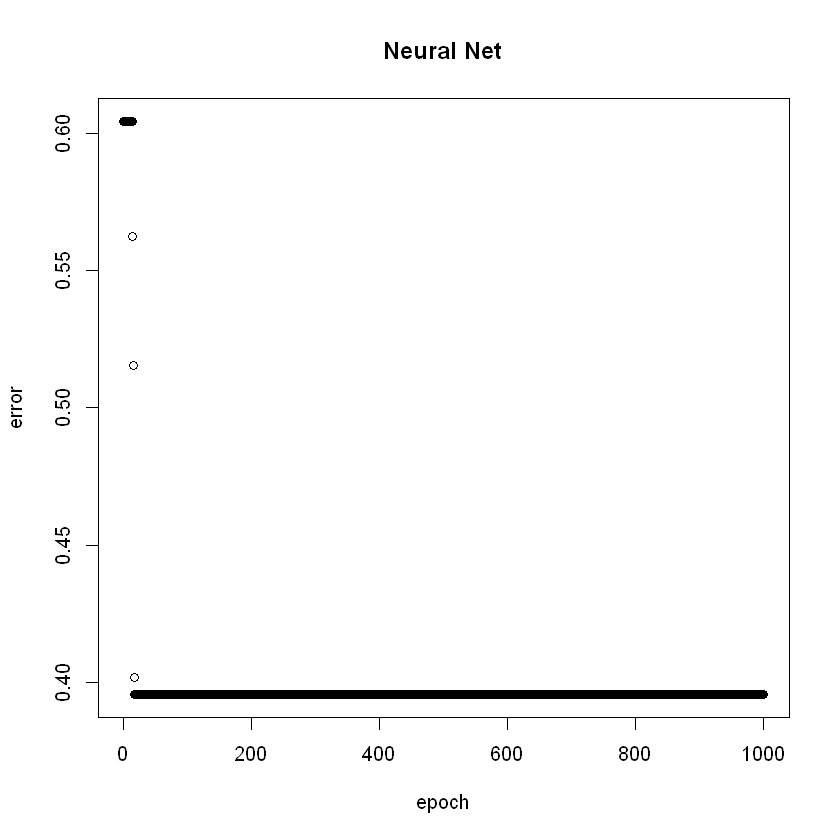

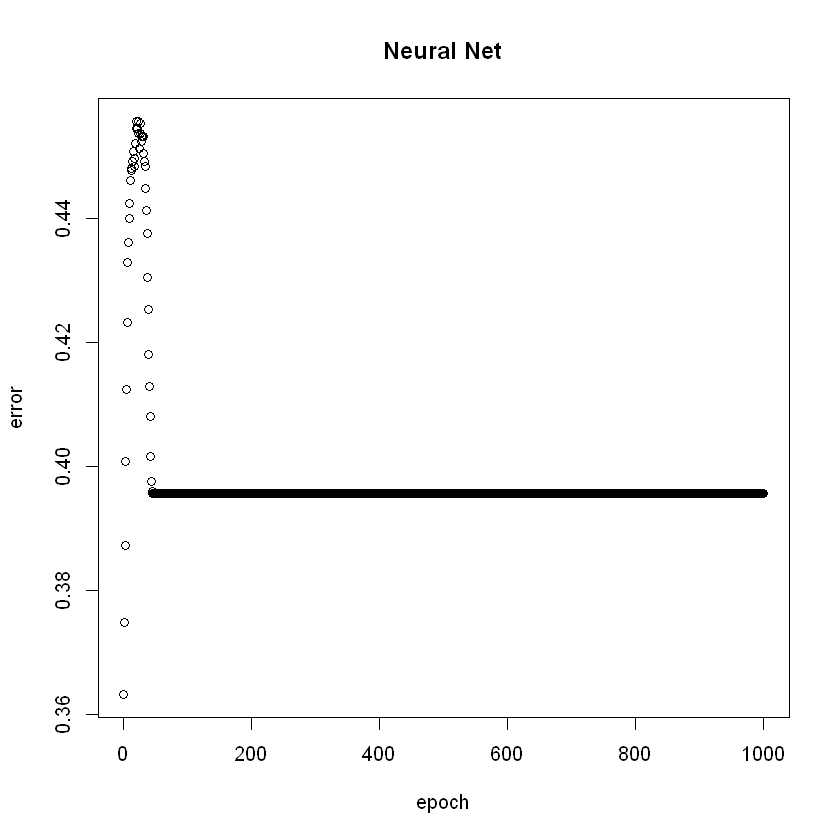

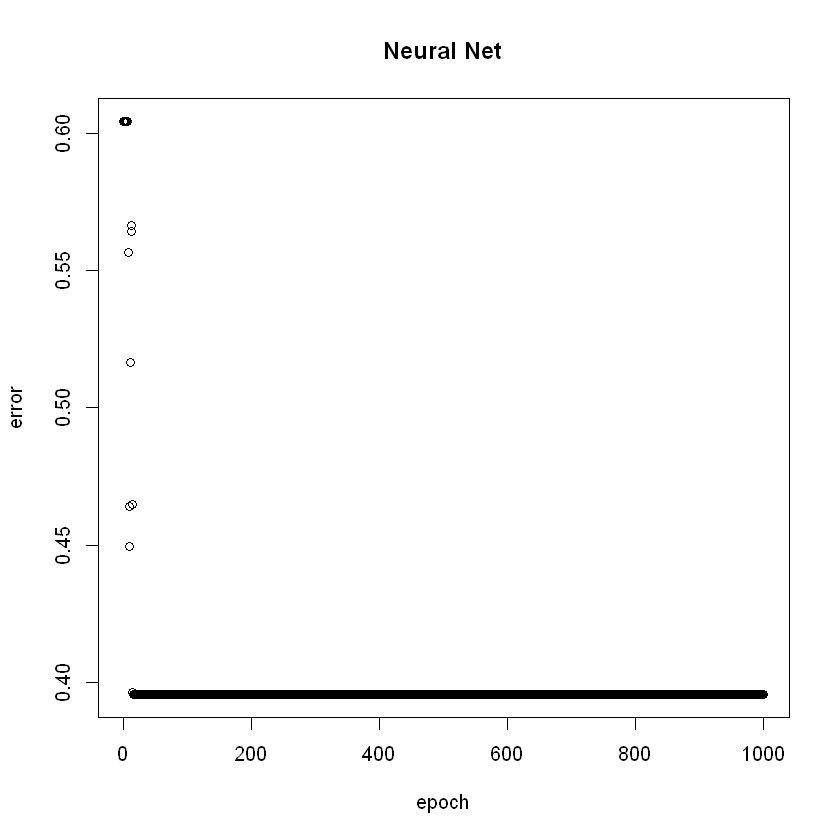

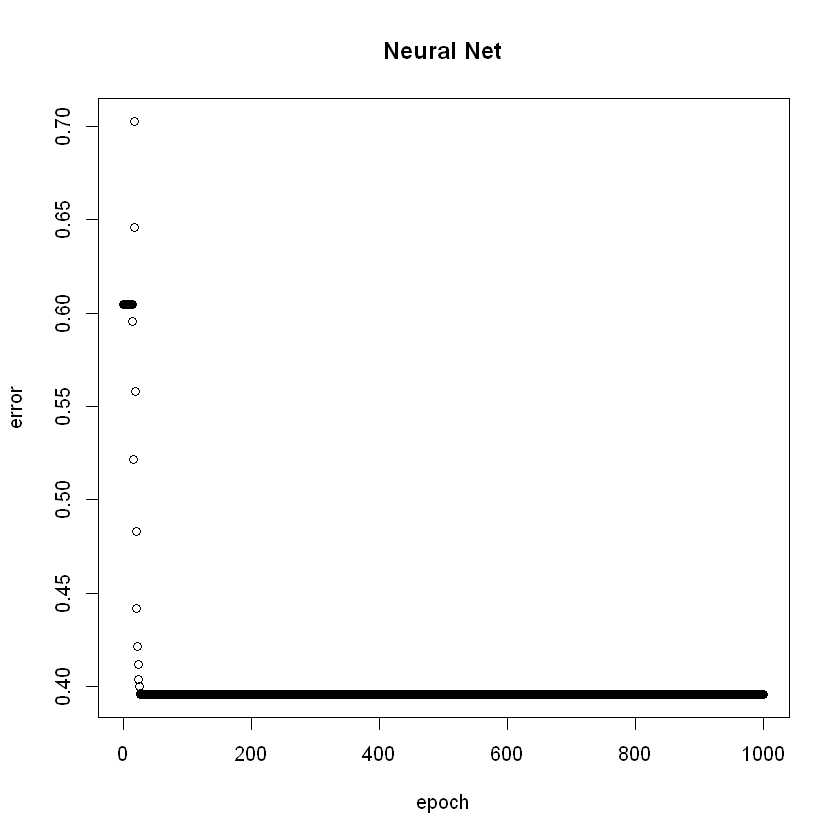

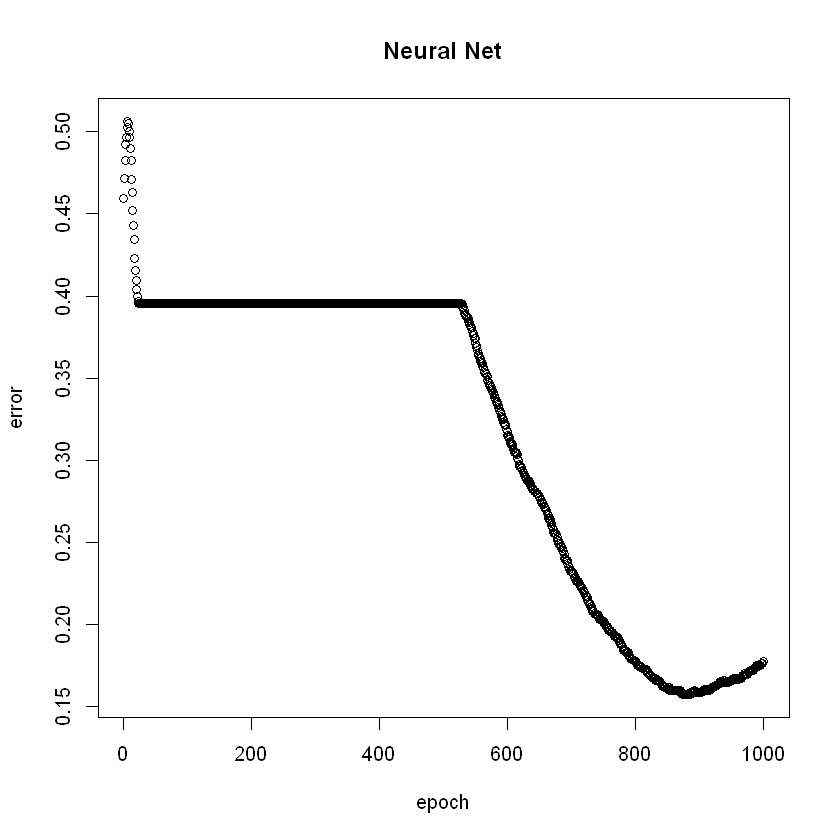

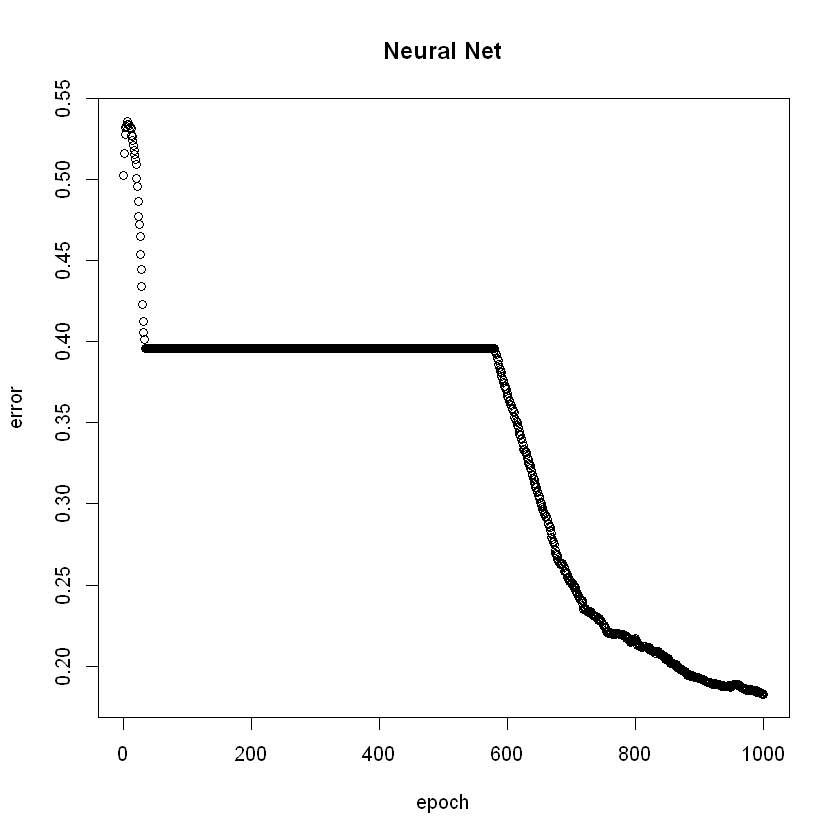

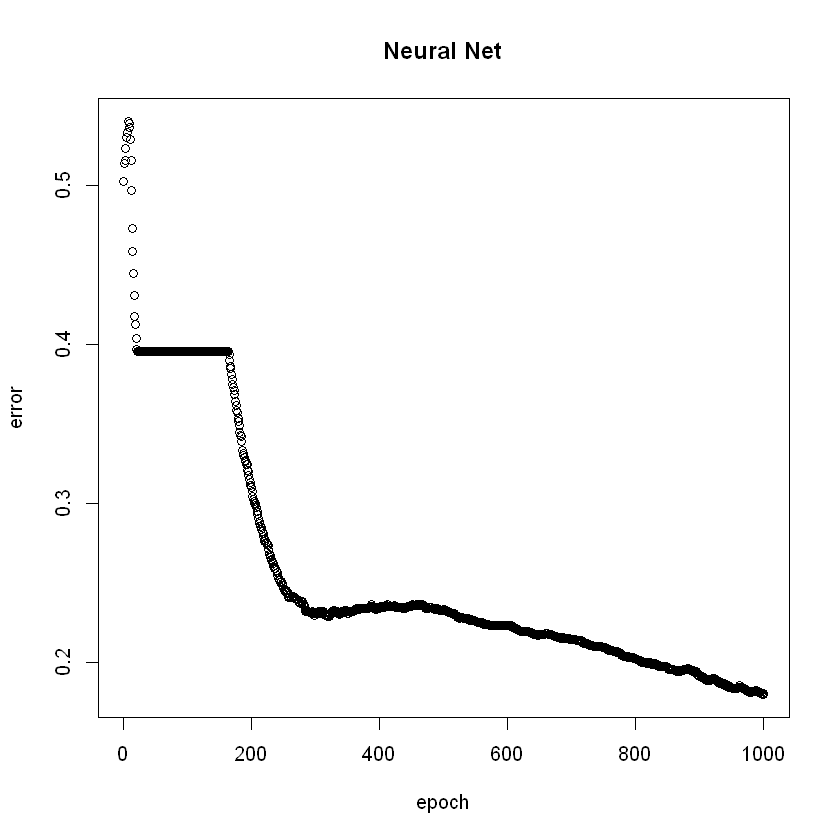

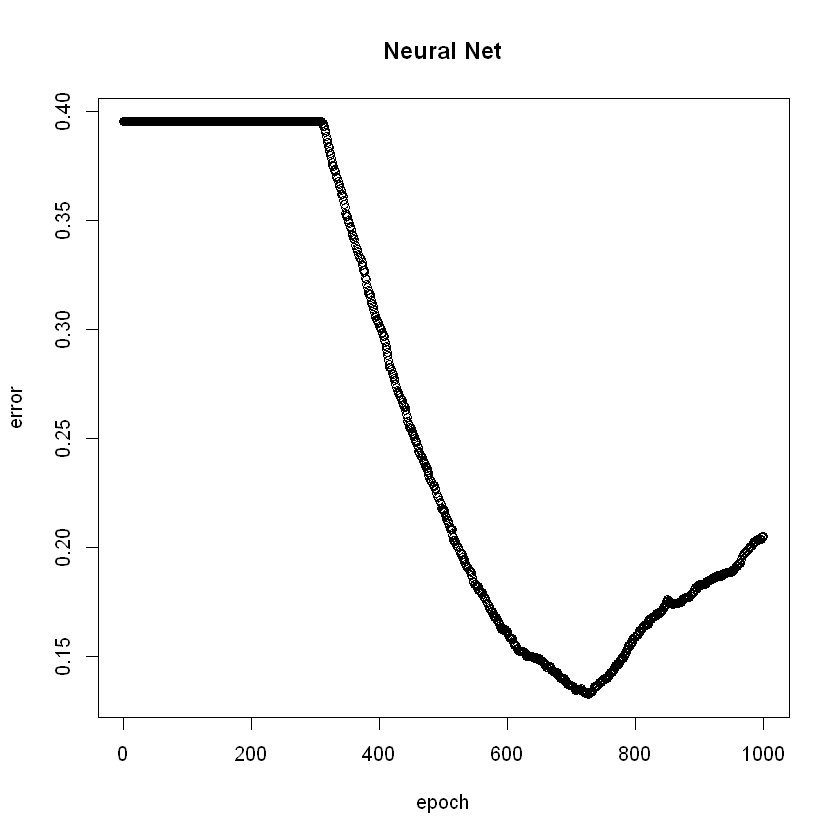

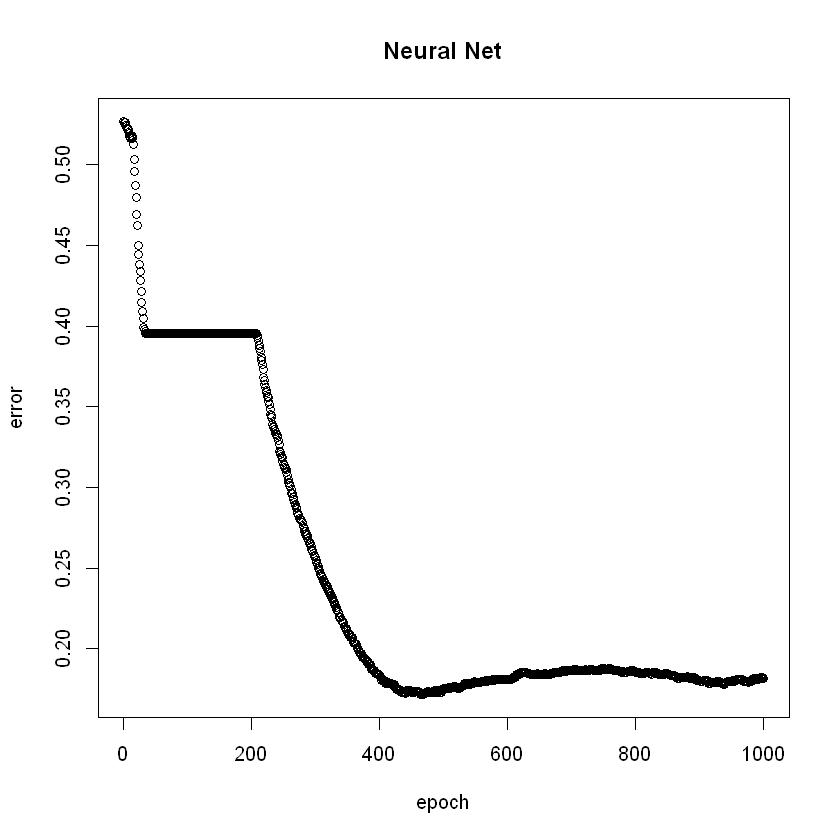

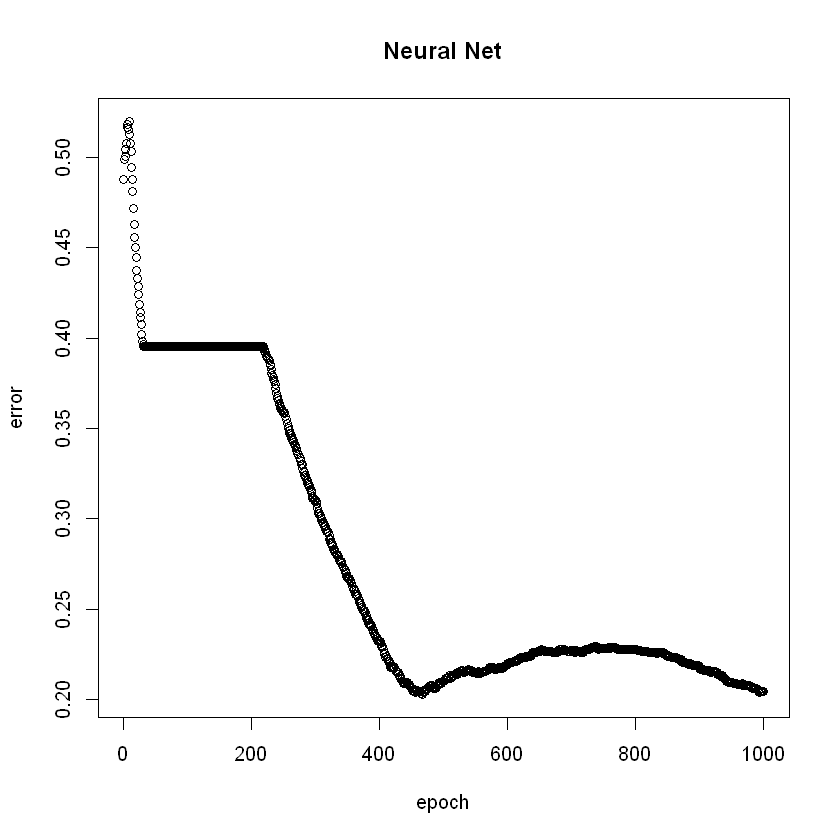

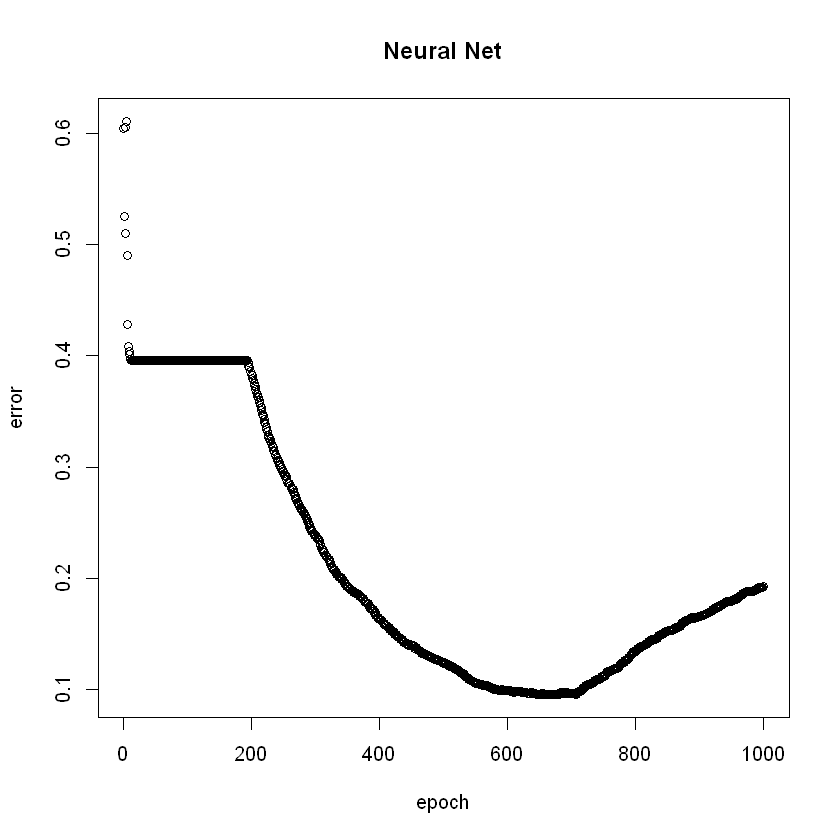

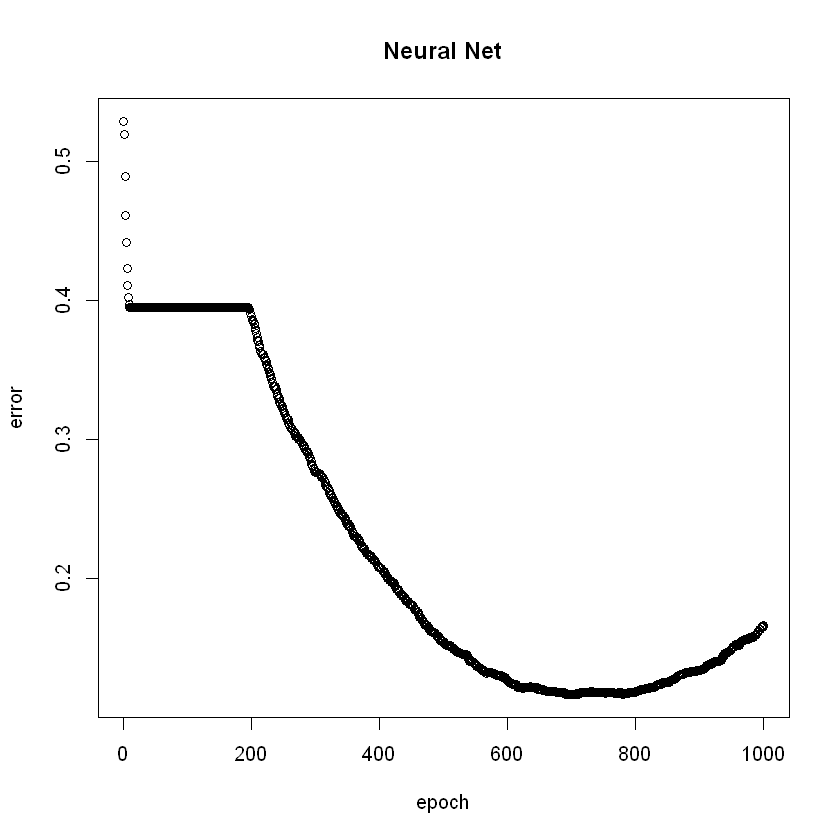

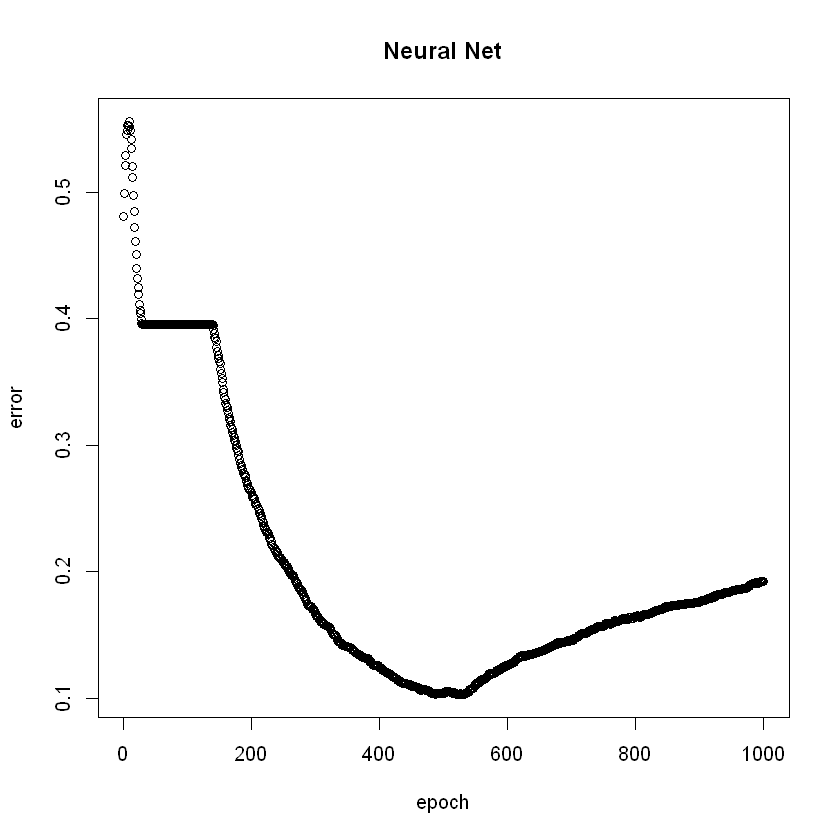

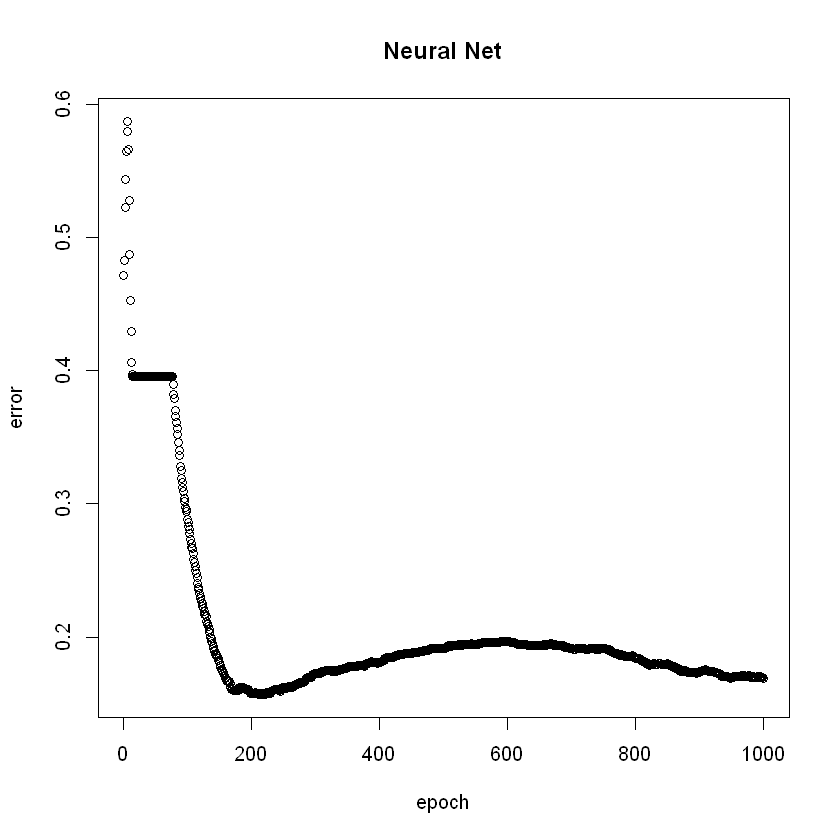

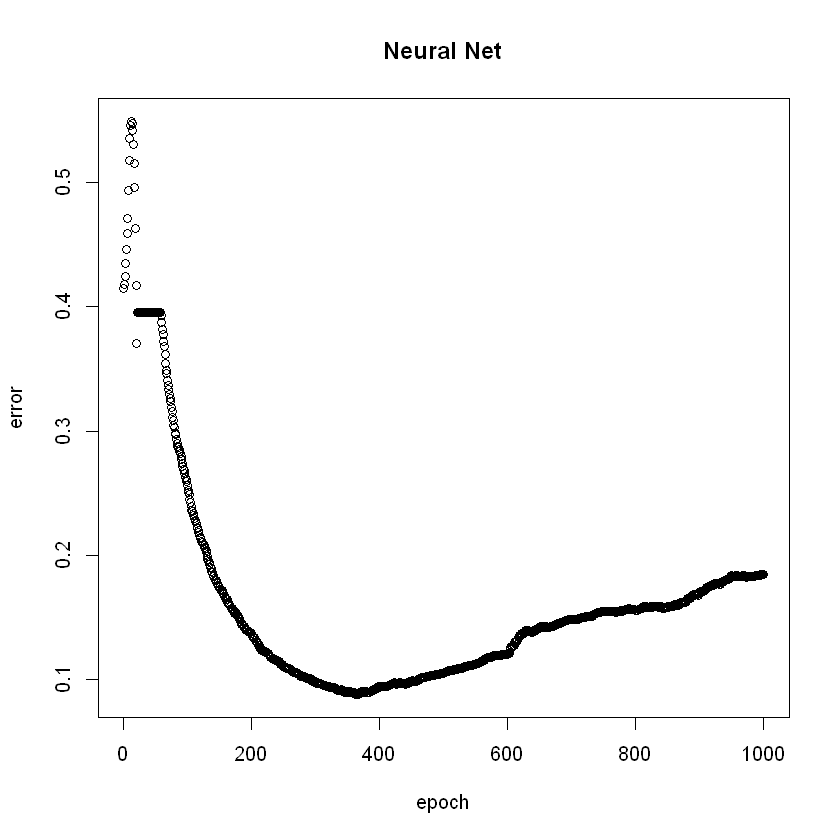

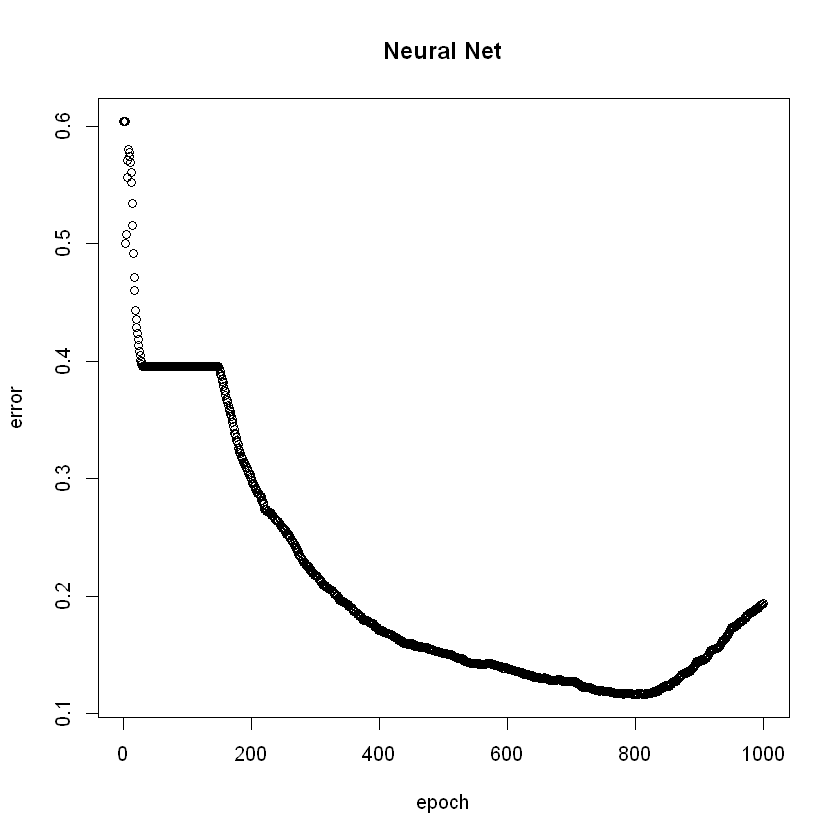

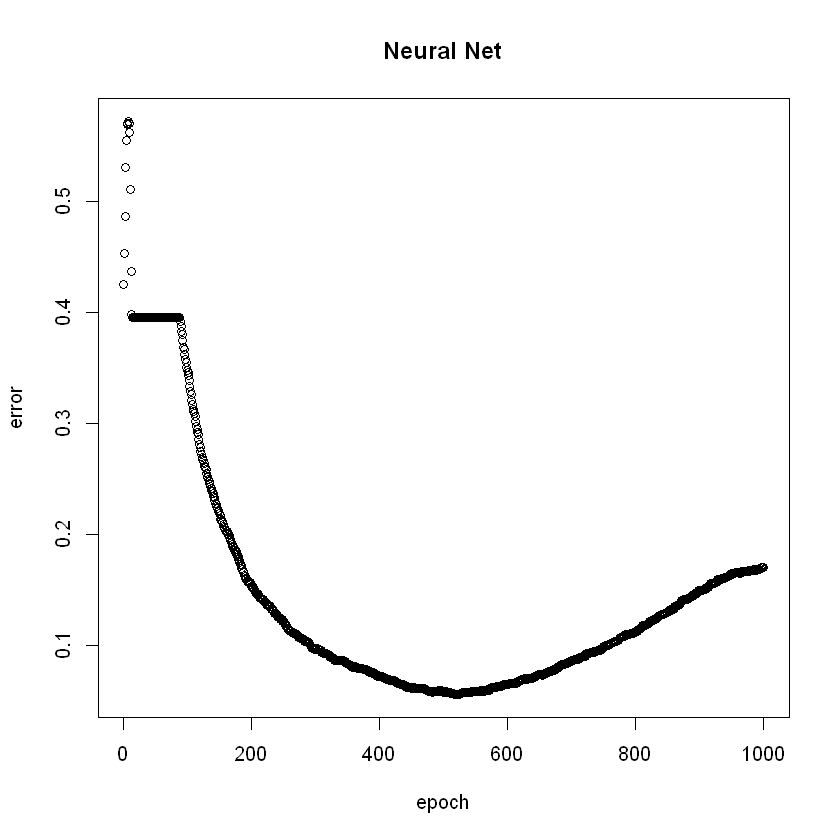

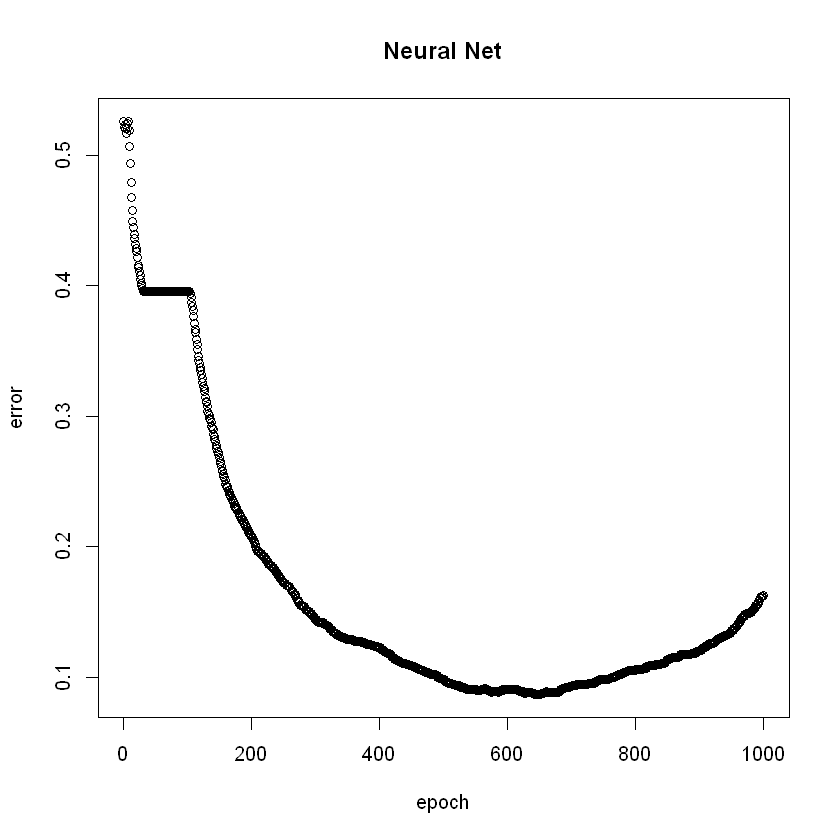

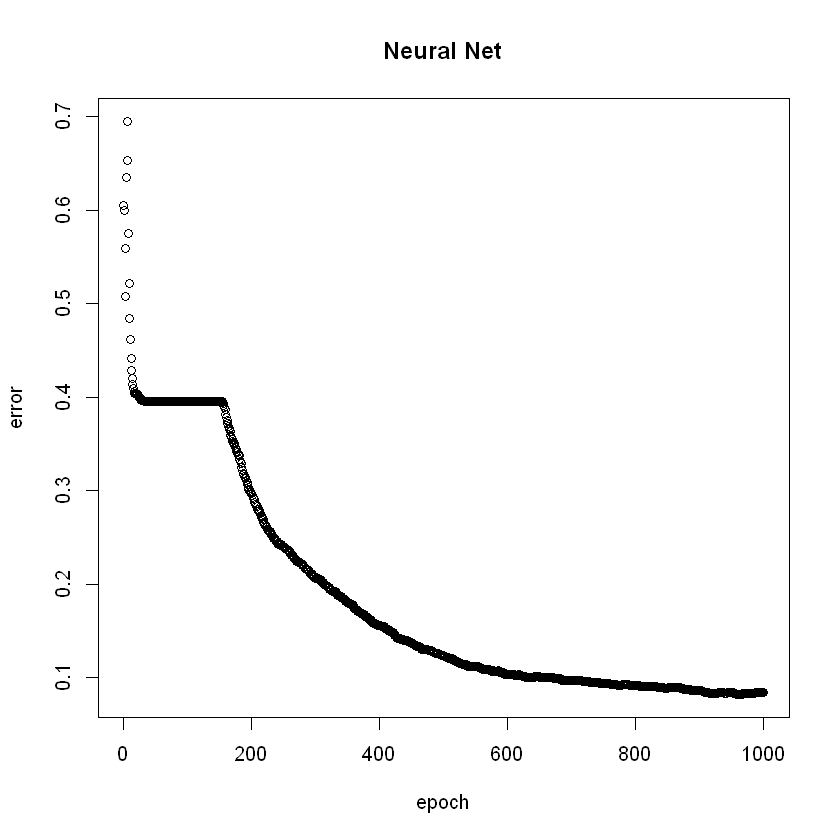

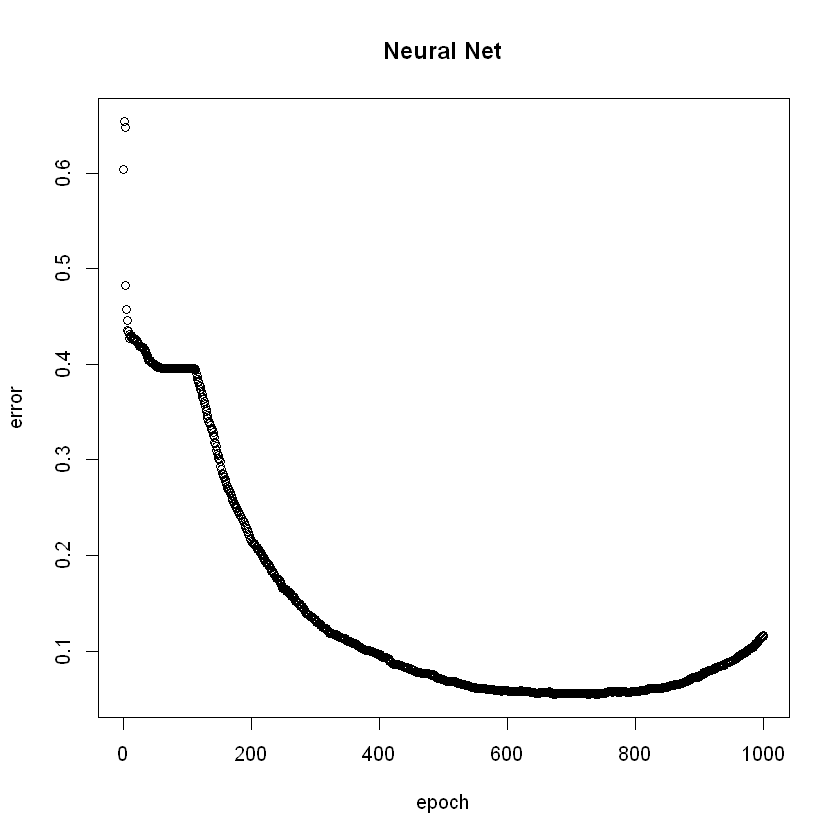

In [38]:
####################### Assignment 3.B #######################
#? Build a number of Neural Networks with different number of units in the hidden layer (TO BE COMPLETE)

for (k in seq(2, 100, 5)) {
  list[W1, W2, b1, b2]<- nn.build(k, X1.t, T1, plotting=TRUE, epoch.max=1000, eta = 0.1, lambda = 0.01)
  test_error[test_error$k==k,'test'] <-  error.rate(nn.predict(X2.t, W1, W2, b1, b2), T2)
 
}

## Evaluate the model

In [40]:
test_error

k,test
2,0.3908
7,0.3908
12,0.3908
17,0.3908
22,0.1736
27,0.1868
32,0.1844
37,0.2096
42,0.1924
47,0.2136


 ## Plot the test error versus number of units i.e., k 

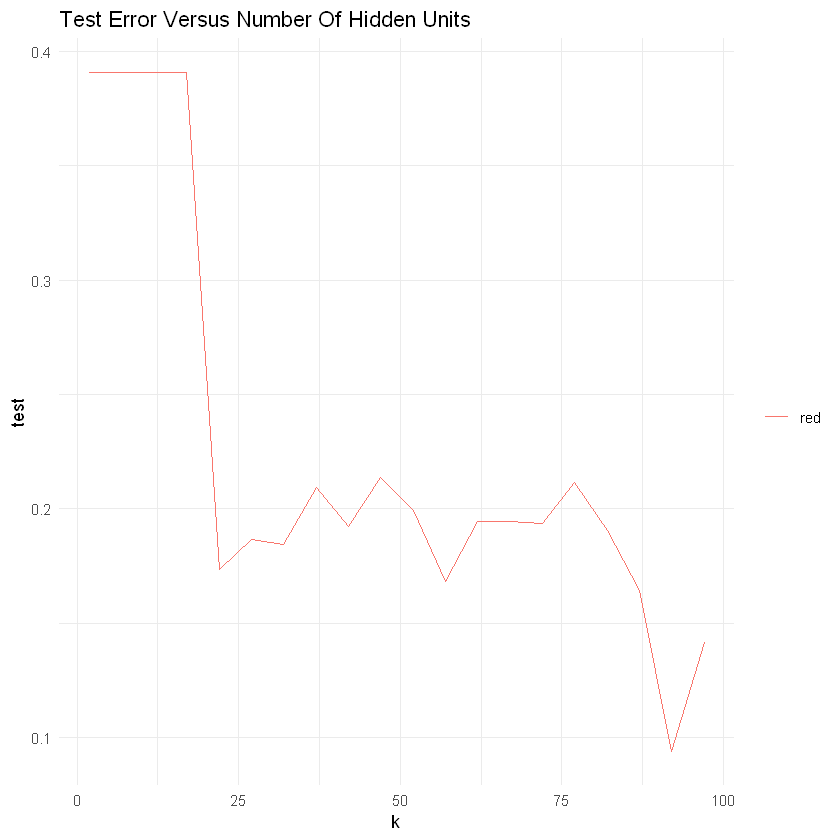

In [41]:
# plot misclassification percentage for train and test data sets
#rmse.m <- melt(rmse, id='K') # reshape for visualization
#names(rmse.m) <- c('K', 'type', 'error')
ggplot(data=test_error, aes(x=k, y=test, color='red')) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Test Error Versus Number Of Hidden Units") + labs(x='Number Of Hidden Units',y='Test Error Rate')

In [72]:
best_k_value<-head(test_error[order(test_error$test),],1)
best_k_value

,k,test
19,92,0.094


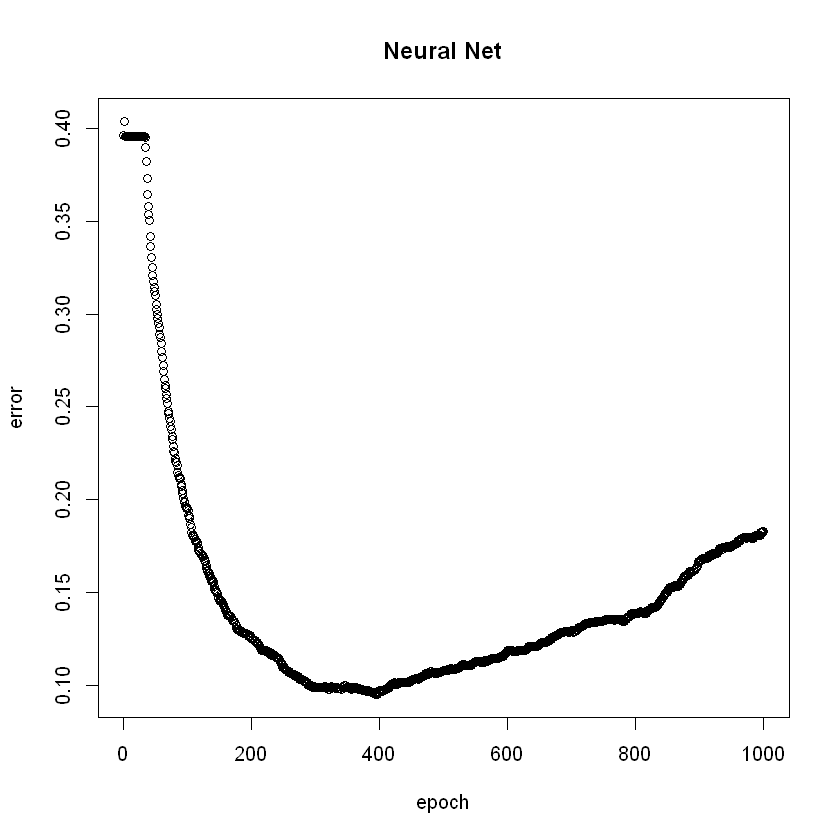

In [33]:
list[W1,W2,b1,b2] <- nn.build(92, X1.t, T1, plotting=TRUE, epoch.max=1000, eta = 0.1, lambda = 0.01)

In [35]:
best_model<-nn.predict(X2.t, W1, W2, b1, b2)
preds<-t(best_model)

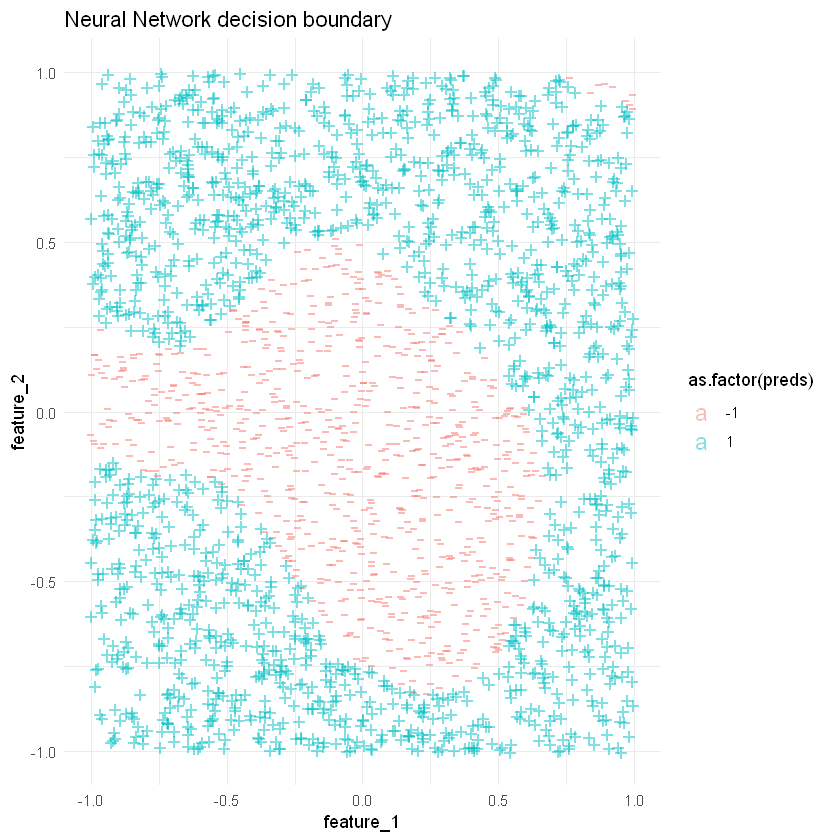

In [37]:
ggplot(data=X2,aes(x=x1,y=x2,color= as.factor(preds), label=ifelse(preds!=-1,"+","-"))) + geom_text(size = 5,alpha=0.5)+
ggtitle("Neural Network decision boundary") +labs(x="feature_1",y="feature_2") + theme_minimal()

## Missclassifed labels for Perceptron

In [38]:
missclassifed<-miss[miss$true != miss$pred,]# missclassifed labels
nrow(missclassifed)

[1] 1292

In [40]:
missclassification<-data.frame(cbind('true_values'=T2,'preds'=preds)) 
colnames(missclassification[1])<-'true_values'
colnames(missclassification[2])<-'preds'
missclassifications<- missclassification[ missclassification$true_values != missclassification$V2,]

## Missclassfied Values for 3 Layer Neural Network

In [42]:
nrow(missclassifications)

[1] 437